In [24]:
import pandas as pd
import glob
from dateutil import parser
import arrow
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import seaborn as sns 

# Misc Cleaning and Formatting

In [3]:
#repeat following functions for all files to add headers
#c_headers = ['company','rating','location','revdate','recommends','outlook','ceo_opinion','wlbalance','career_ops']
#db = pd.read_csv('uber_reviews.csv',header=None)
#db.to_csv('uber_raw.csv', header=c_headers, index=False)

FileNotFoundError: [Errno 2] File uber_reviews.csv does not exist: 'uber_reviews.csv'

In [60]:
#combine csv files
#all_filenames = [x for x in glob.glob('*.{}'.format('csv'))]
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#combined_csv.to_csv('combined_raw.csv', index=False, encoding='utf-8')

In [191]:
#combined_csv.to_csv('combined.csv', index=False, encoding='utf-8')

In [201]:
#combined = pd.read_csv('combined.csv')

In [164]:
#date reformatting
#def shortdate(str):
    #return arrow.get(' '.join(str.split(' ')[1:4]),'MMM D YYYY').format('MM-DD-YYYY')
#combined_csv['revdate'] = combined_csv['revdate'].apply(lambda x: shortdate(x) if pd.notnull(x) else x)

In [203]:
#add a year column to the dataframe
#def getyear(dt):
    #return dt.year

#combined['revdate'] = pd.to_datetime(combined['revdate'])
#combined['year'] = combined['revdate'].apply(getyear)

In [248]:
#use the following 3cells to fix the column formatting error: occassionally, data scraped would be missing for recommends or outlook, causing the outlook or ceo value to be sorted into the wrong column; the xml tag used to gather these values needs revision, but this stop gap seems to have worked to fix the error in cleaning

#m = combined['recommends'].isin(['Recommends', 'Doesn\'t Recommend', 'Neutral Outlook','Negative Outlook','Positive Outlook'])
#combined.loc[~m, 'recommends'] = combined.loc[~m, 'ceo_opinion'].to_numpy()

In [250]:
#m2 = combined['recommends'].isin(['Recommends', 'Doesn\'t Recommend'])
#combined.loc[~m2, 'recommends'] = combined.loc[~m2, 'outlook'].to_numpy()
#combined.loc[~m2, 'recommends'] = np.NaN

In [253]:
#m3 = combined['outlook'].isin(['Neutral Outlook','Negative Outlook','Positive Outlook'])
#combined.loc[~m3, 'outlook'] = combined.loc[~m3, 'ceo_opinion'].to_numpy()
#combined.loc[~m3, 'outlook'] = np.NaN

In [289]:
#update the combined file
#combined.to_csv('combined.csv', index=False, encoding='utf-8')

In [261]:
#format outlook for lower first word
#def lessoutlook(string):
#    return string.split(' ')[0].lower()
#combined['outlook'] = combined['outlook'].apply(lambda x: lessoutlook(x) if pd.notnull(x) else x)

In [275]:
#format recommends
#combined['recommends']=combined['recommends'].replace('Recommends','y')
#combined['recommends']=combined['recommends'].replace('Doesn\'t Recommend','n')

In [285]:
#format ceo opinion
#combined['ceo_opinion'] = combined['ceo_opinion'].replace('Approves of CEO', 'approves')
#combined['ceo_opinion'] = combined['ceo_opinion'].replace('No opinion of CEO', 'no opinion')
#combined['ceo_opinion'] = combined['ceo_opinion'].replace('Disapproves of CEO', 'disapproves')

# Overall Comparisons

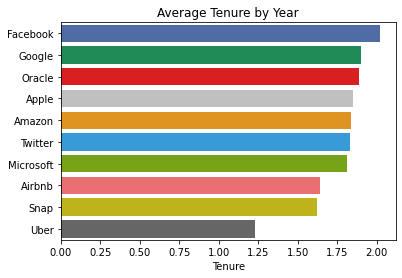

In [517]:
setavgtenure = {'company': ['Facebook', 'Google','Oracle','Apple','Amazon','Twitter','Microsoft','Airbnb','Snap','Uber'],
         'tenure': [2.02, 1.90, 1.89, 1.85, 1.84, 1.83, 1.81, 1.64, 1.62, 1.23]}
avgtenure = pd.DataFrame(setavgtenure, columns = ['company','tenure'])
avgtenure
tenure_bar = sns.barplot(x="tenure", y="company",
              data=avgtenure, palette=color_dict).set(title = 'Average Tenure by Year', ylabel = '', xlabel = 'Tenure')

In [205]:
#at a glance
combined

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
0,Airbnb,5.0,"Portland, OR",NaT,y,positive,approves,4.0,5.0,NaN
1,Airbnb,5.0,"San Francisco, CA",2020-10-14,y,positive,approves,5.0,5.0,2020.0
2,Airbnb,4.0,"San Francisco, CA",2020-10-20,y,positive,approves,4.0,4.0,2020.0
3,Airbnb,5.0,"San Francisco, CA",2020-10-06,y,neutral,approves,5.0,5.0,2020.0
4,Airbnb,5.0,"Hurricane, UT",2020-10-03,y,positive,approves,5.0,5.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
34620,Uber,4.0,NaN,2014-08-09,y,positive,approves,1.0,3.0,2014.0
34621,Uber,5.0,NaN,2014-05-01,y,positive,approves,3.0,5.0,2014.0
34622,Uber,5.0,NaN,2013-11-26,y,positive,approves,5.0,5.0,2013.0
34623,Uber,5.0,NaN,2013-02-01,y,positive,NaN,3.0,4.0,2013.0


In [18]:
revcount = combined['company'].value_counts().to_frame().reset_index()

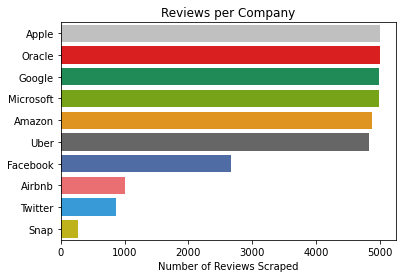

In [338]:
#color assignment by company for use and reference; use google to find color hex codes related to companies
color_dict = dict({'Facebook':'#4267B2',
                  'Google':'#0F9D58',
                  'Oracle': '#f80000',
                  'Apple': '#C0C0C0',
                   'Amazon': '#FF9900',
                  'Twitter': '#1DA1F2',
                  'Microsoft': '#7FBA00',
                  'Airbnb': '#FF5A5F',
                  'Snap': '#d9ca00',
                  'Uber': '#666666'})
revcount.columns = ['Company', 'Number of Reviews']
revcount_bar = sns.barplot(x="Number of Reviews", y="Company",
              data=revcount, palette=color_dict).set(title = 'Reviews per Company', ylabel = '', xlabel = 'Number of Reviews Scraped')

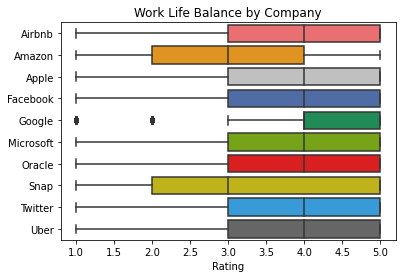

In [339]:
wlbal_box = sns.boxplot(x="wlbalance", y="company",
              data=combined, palette=color_dict).set(title = 'Work Life Balance by Company', ylabel = '', xlabel = 'Rating')

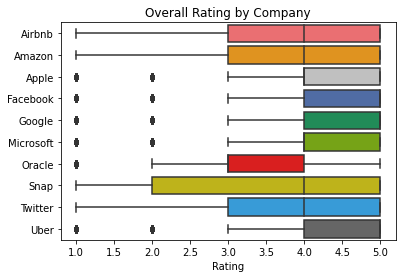

In [340]:
rating_box = sns.boxplot(x="rating", y="company",
              data=combined, palette=color_dict).set(title = 'Overall Rating by Company', ylabel = '', xlabel = 'Rating')

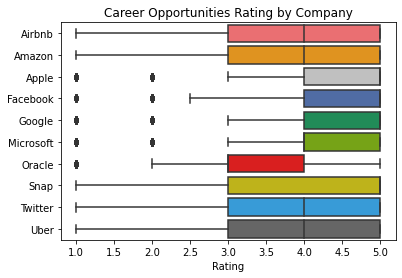

In [341]:
careerops_box = sns.boxplot(x="career_ops", y="company",
              data=combined, palette=color_dict).set(title = 'Career Opportunities Rating by Company', ylabel = '', xlabel = 'Rating')

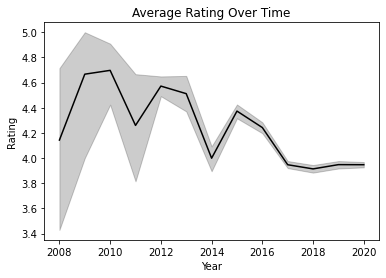

In [326]:
rating_time_agg = sns.lineplot(x='year',y='rating', data=combined, color = 'black').set(title = 'Overall Rating Over Time', ylabel = 'Rating',xlabel = 'Year')

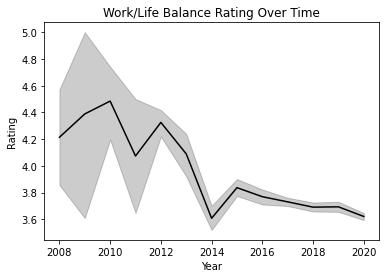

In [327]:
wlbalance_time_agg = sns.lineplot(x='year',y='wlbalance', data=combined, color = 'black').set(title = 'Work/Life Balance Rating Over Time', ylabel = 'Rating',xlabel = 'Year')

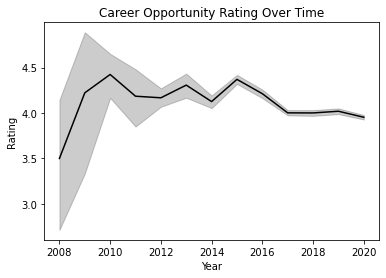

In [328]:
careerops_time_agg = sns.lineplot(x='year',y='career_ops', data=combined, color = 'black').set(title = 'Career Opportunity Rating Over Time', ylabel = 'Rating',xlabel = 'Year')

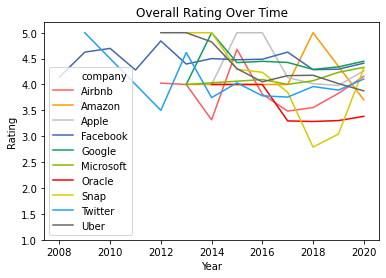

In [351]:
rating_time = sns.lineplot(x='year',y='rating', data=combined, hue = 'company', palette = color_dict, ci= None).set(title = 'Overall Rating Over Time', ylabel = 'Rating',xlabel = 'Year', ylim=(1,5.2))

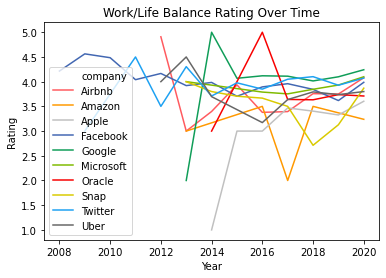

In [343]:
wlbalance_time = sns.lineplot(x='year',y='wlbalance', data=combined, hue = 'company', palette = color_dict, ci= None).set(title = 'Work/Life Balance Rating Over Time', ylabel = 'Rating',xlabel = 'Year')

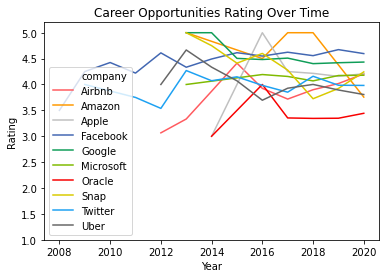

In [350]:
careerops_time = sns.lineplot(x='year',y='career_ops', data=combined, hue = 'company', palette = color_dict, ci= None).set(title = 'Career Opportunities Rating Over Time', ylabel = 'Rating',xlabel = 'Year', ylim = (1,5.2))

In [ ]:
facebook = combined.loc[combined.company == "Facebook"]
google = combined.loc[combined.company == "Google"]
oracle = combined.loc[combined.company == "Oracle"]
apple = combined.loc[combined.company == "Apple"]
amazon = combined.loc[combined.company == "Amazon"]
twitter = combined.loc[combined.company == "Twitter"]
microsoft = combined.loc[combined.company == "Microsoft"]
airbnb = combined.loc[combined.company == "Airbnb"]
snap = combined.loc[combined.company == "Snap"]
uber = combined.loc[combined.company == "Uber"]

In [521]:
#snapvapple = combined.loc[(combined.company == 'Snap') | (combined.company == 'Apple')]
#snapvapple
#Test = sns.lineplot(x='year',y='wlbalance',data=snapvapple, hue = 'company', palette = color_dict).set(xlim=(2010,2020),title = 'Facebook Work/Life Balance Rating Over Time', xlabel = 'Year', ylabel = 'Rating')

# Close Look - Facebook

In [110]:
facebook

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops
11001,Facebook,5.0,"San Francisco, CA",NaN,y,positive,approves,3.0,5.0
11002,Facebook,5.0,"Menlo Park, CA",11-04-2020,y,neutral,approves,5.0,5.0
11003,Facebook,5.0,"Seattle, WA",11-02-2020,y,positive,approves,5.0,5.0
11004,Facebook,5.0,"Menlo Park, CA",11-03-2020,y,positive,approves,4.0,5.0
11005,Facebook,5.0,"Menlo Park, CA",02-16-2017,y,positive,approves,5.0,5.0
...,...,...,...,...,...,...,...,...,...
13660,Facebook,4.0,"Dublin, Dublin",05-14-2012,y,NaN,NaN,3.5,3.0
13661,Facebook,5.0,Sydney,03-26-2012,y,NaN,NaN,5.0,5.0
13662,Facebook,5.0,"London, England",03-23-2012,y,NaN,NaN,4.5,5.0
13663,Facebook,5.0,"Dublin, Dublin",03-29-2012,y,NaN,NaN,5.0,5.0


In [209]:
facebook.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2008.0,7
2009.0,8
2010.0,33
2011.0,25
2012.0,208
2013.0,76
2014.0,132
2015.0,222
2016.0,246


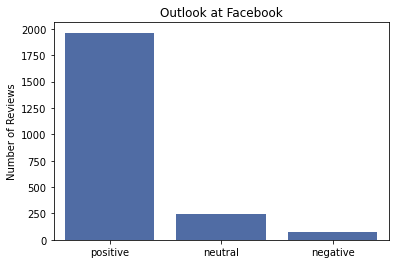

In [352]:
fboutlook = facebook['outlook'].value_counts().to_frame().reset_index()
fboutlook_bar = sns.barplot(x="index", y="outlook",
              data=fboutlook, color='#4267B2').set(title = 'Outlook at Facebook', ylabel = 'Number of Reviews', xlabel = '')
#graph shows outlook at facebook

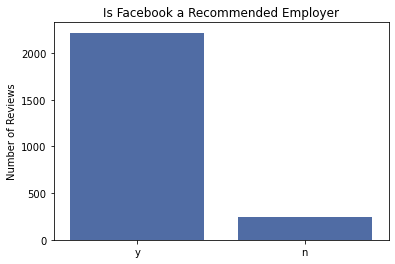

In [353]:
fbrecs = facebook['recommends'].value_counts().to_frame().reset_index()
fbrecs_bar = sns.barplot(x="index", y="recommends",
              data=fbrecs, color='#4267B2').set(title = 'Is Facebook a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

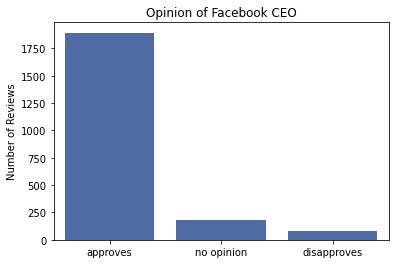

In [354]:
fbceo = facebook['ceo_opinion'].value_counts().to_frame().reset_index()
fbceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=fbceo, color='#4267B2').set(title = 'Opinion of Facebook CEO', ylabel = 'Number of Reviews', xlabel = '')

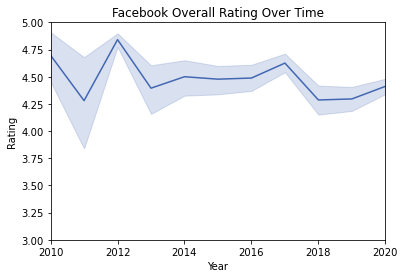

In [356]:
fbrating_time = sns.lineplot(x='year',y='rating',data=facebook, color='#4267B2').set(xlim=(2010,2020),ylim=(3,5),title = 'Facebook Overall Rating Over Time', xlabel = 'Year', ylabel = 'Rating')
#graph show facebook's overall rating over time

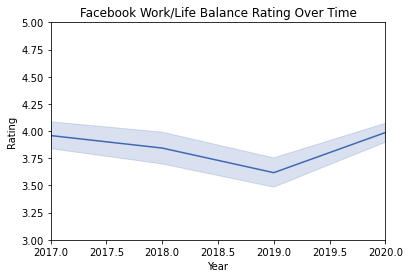

In [518]:
compfbwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=facebook, color='#4267B2').set(xlim=(2017,2020),ylim=(3,5),title = 'Facebook Work/Life Balance Rating Over Time', xlabel = 'Year', ylabel = 'Rating')

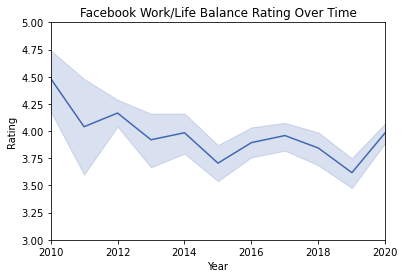

In [357]:
fbwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=facebook, color='#4267B2').set(xlim=(2010,2020),ylim=(3,5),title = 'Facebook Work/Life Balance Rating Over Time', xlabel = 'Year', ylabel = 'Rating')

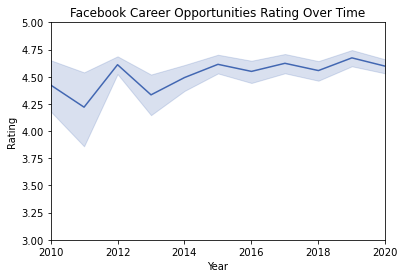

In [358]:
fbcareerops_time = sns.lineplot(x='year',y='career_ops',data=facebook, color='#4267B2').set(xlim=(2010,2020),ylim=(3,5),title = 'Facebook Career Opportunities Rating Over Time', xlabel = 'Year', ylabel = 'Rating')

# Close Look - Google

In [157]:
google

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
13665,Google,5.0,"Cambridge, MA",2020-11-04,y,neutral,approves,5.0,5.0,2020.0
13666,Google,4.0,"Mountain View, CA",2013-06-21,n,negative,no opinion,2.0,5.0,2013.0
13667,Google,5.0,"New York, NY",2014-05-10,y,positive,approves,5.0,5.0,2014.0
13668,Google,5.0,"Sunnyvale, CA",2020-11-03,y,positive,approves,2.0,5.0,2020.0
13669,Google,5.0,"Pittsburgh, PA",2020-11-03,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...
18660,Google,4.0,NaN,2015-06-29,n,negative,approves,5.0,3.0,2015.0
18661,Google,2.0,NaN,2015-06-29,y,positive,NaN,2.0,3.0,2015.0
18662,Google,4.0,NaN,2015-06-29,y,neutral,no opinion,4.0,2.0,2015.0
18663,Google,5.0,"Mountain View, CA",2015-06-14,NaN,NaN,NaN,NaN,NaN,2015.0


In [216]:
google.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2013.0,1
2014.0,1
2015.0,566
2016.0,845
2017.0,881
2018.0,817
2019.0,750
2020.0,1136


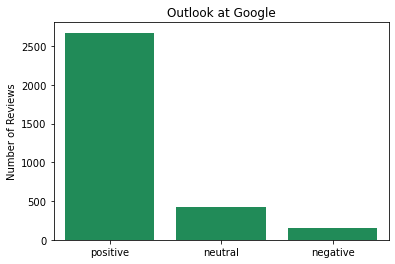

In [359]:
ggloutlook = google['outlook'].value_counts().to_frame().reset_index()
ggloutlook_bar = sns.barplot(x="index", y="outlook",
              data=ggloutlook, color='#0F9D58').set(title = 'Outlook at Google', ylabel = 'Number of Reviews', xlabel = '')

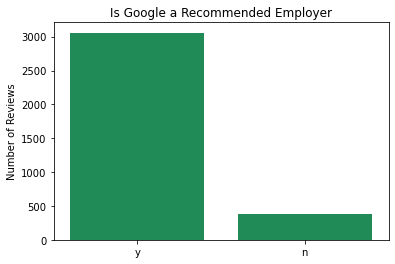

In [360]:
gglrecs = google['recommends'].value_counts().to_frame().reset_index()
gglrecs_bar = sns.barplot(x="index", y="recommends",
              data=gglrecs, color='#0F9D58').set(title = 'Is Google a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

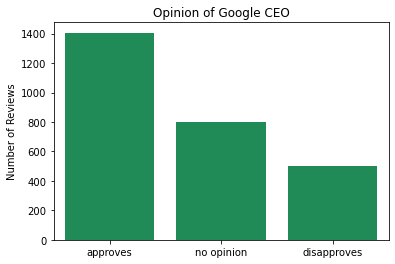

In [361]:
gglceo = amazon['ceo_opinion'].value_counts().to_frame().reset_index()
gglceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=gglceo, color='#0F9D58').set(title = 'Opinion of Google CEO', ylabel = 'Number of Reviews', xlabel = '')

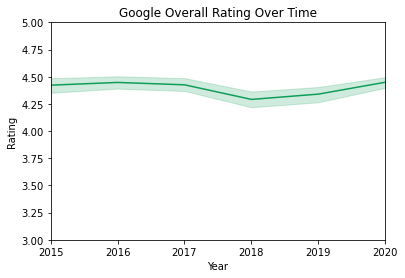

In [446]:
gglrating_time = sns.lineplot(x='year',y='rating',data=google, color='#0F9D58').set(xlabel = 'Year', ylabel = 'Rating',title = 'Google Overall Rating Over Time',xlim=(2015,2020), ylim=(3,5))

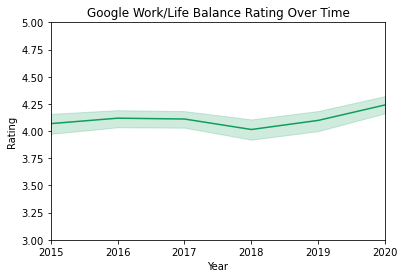

In [502]:
gglwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=google, color='#0F9D58').set(xlabel = 'Year', ylabel = 'Rating',title = 'Google Work/Life Balance Rating Over Time',xlim=(2015,2020), ylim=(3,5))

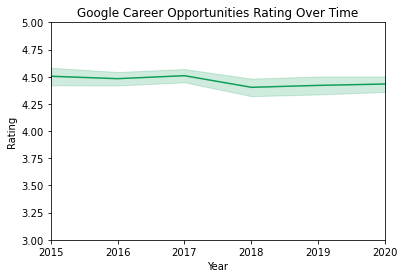

In [503]:
gglcareerops_time = sns.lineplot(x='year',y='career_ops',data=google, color='#0F9D58').set(xlabel = 'Year', ylabel = 'Rating',title = 'Google Career Opportunities Rating Over Time',xlim=(2015,2020), ylim=(3,5))

# Close Look - Apple

In [217]:
#at a glance
apple

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
6001,Apple,5.0,"New York, NY",2020-11-03,y,neutral,no opinion,1.0,5.0,2020.0
6002,Apple,4.0,NaN,2014-08-28,y,positive,approves,1.0,3.0,2014.0
6003,Apple,5.0,"Cupertino, CA",2020-10-28,y,positive,approves,5.0,3.0,2020.0
6004,Apple,5.0,"New York, NY",2020-11-03,NaN,NaN,NaN,3.0,5.0,2020.0
6005,Apple,5.0,"Cupertino, CA",2020-11-02,y,positive,approves,4.0,4.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
10996,Apple,4.0,NaN,2017-07-25,y,positive,approves,4.0,5.0,2017.0
10997,Apple,1.0,"Cupertino, CA",2017-08-01,n,negative,disapproves,1.0,2.0,2017.0
10998,Apple,5.0,"Rancho Cucamonga, CA",2017-07-04,y,positive,NaN,5.0,5.0,2017.0
10999,Apple,1.0,"Southlake, TX",2017-08-13,n,negative,disapproves,1.0,2.0,2017.0


In [218]:
#if time series, should any years be excluded?
apple.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2014.0,1
2015.0,1
2016.0,1
2017.0,736
2018.0,1408
2019.0,1429
2020.0,1424


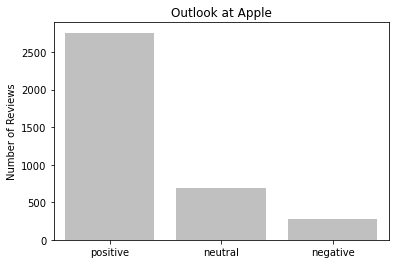

In [450]:
aploutlook = apple['outlook'].value_counts().to_frame().reset_index()
aploutlook_bar = sns.barplot(x="index", y="outlook",
              data=aploutlook, color='#C0C0C0').set(title = 'Outlook at Apple', ylabel = 'Number of Reviews', xlabel = '')

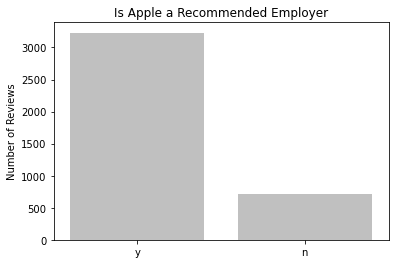

In [363]:
aplrecs = apple['recommends'].value_counts().to_frame().reset_index()
aplrecs_bar = sns.barplot(x="index", y="recommends",
              data=aplrecs, color='#C0C0C0').set(title = 'Is Apple a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

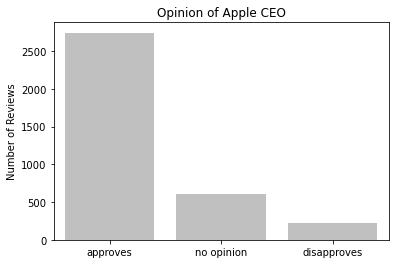

In [364]:
aplceo = apple['ceo_opinion'].value_counts().to_frame().reset_index()
aplceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=aplceo, color='#C0C0C0').set(title = 'Opinion of Apple CEO', ylabel = 'Number of Reviews', xlabel = '')

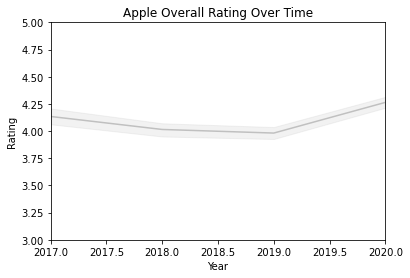

In [520]:
aplrating_time = sns.lineplot(x='year',y='rating',data=apple, color='#C0C0C0').set(xlabel = 'Year', ylabel = 'Rating',title = 'Apple Overall Rating Over Time',xlim=(2017,2020), ylim=(3,5))

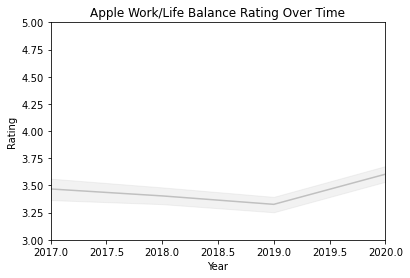

In [501]:
aplwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=apple, color='#C0C0C0').set(xlabel = 'Year', ylabel = 'Rating',title = 'Apple Work/Life Balance Rating Over Time',xlim=(2017,2020), ylim=(3,5))

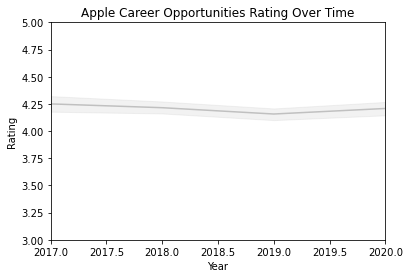

In [504]:
aplcareerops_time = sns.lineplot(x='year',y='career_ops',data=apple, color='#C0C0C0').set(xlabel = 'Year', ylabel = 'Rating',title = 'Apple Career Opportunities Rating Over Time',xlim=(2017,2020), ylim=(3,5))

# Close Look - Oracle

In [222]:
#at a glance
oracle

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
23665,Oracle,5.0,"London, OH",2020-09-10,y,positive,approves,2.0,5.0,2020.0
23666,Oracle,4.0,"Denver, CO",2014-10-21,y,positive,disapproves,3.0,3.0,2014.0
23667,Oracle,4.0,"Durham, NC",2020-11-05,n,negative,no opinion,4.0,4.0,2020.0
23668,Oracle,5.0,"Denver, CO",2020-11-03,y,positive,NaN,4.0,5.0,2020.0
23669,Oracle,5.0,"Lehi, UT",2020-11-03,y,positive,approves,4.0,4.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
28659,Oracle,4.0,"Redwood Shores, CA",2017-03-09,y,positive,approves,4.0,4.0,2017.0
28660,Oracle,4.0,NaN,2017-03-10,y,positive,NaN,5.0,5.0,2017.0
28661,Oracle,4.0,NaN,2017-03-10,y,positive,approves,5.0,4.0,2017.0
28662,Oracle,2.0,"Redwood Shores, CA",2017-03-22,n,neutral,disapproves,3.0,3.0,2017.0


In [223]:
#if time series, should any years be excluded?
oracle.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2014.0,1
2016.0,1
2017.0,1546
2018.0,1325
2019.0,1136
2020.0,990


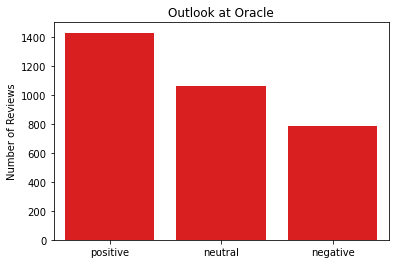

In [366]:
ocloutlook = oracle['outlook'].value_counts().to_frame().reset_index()
ocloutlook_bar = sns.barplot(x="index", y="outlook",
              data=ocloutlook, color='#f80000').set(title = 'Outlook at Oracle', ylabel = 'Number of Reviews', xlabel = '')

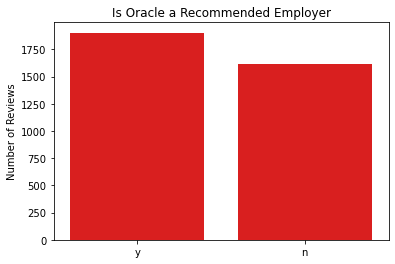

In [367]:
oclrecs = oracle['recommends'].value_counts().to_frame().reset_index()
oclrecs_bar = sns.barplot(x="index", y="recommends",
              data=oclrecs, color='#f80000').set(title = 'Is Oracle a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

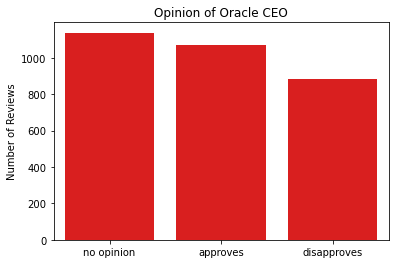

In [368]:
oclceo = oracle['ceo_opinion'].value_counts().to_frame().reset_index()
oclceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=oclceo, color='#f80000').set(title = 'Opinion of Oracle CEO', ylabel = 'Number of Reviews', xlabel = '')

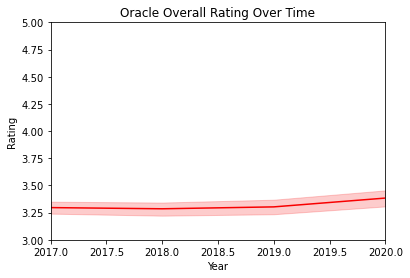

In [454]:
orcrating_time = sns.lineplot(x='year',y='rating',data=oracle, color='#f80000').set(xlabel = 'Year', ylabel = 'Rating',title = 'Oracle Overall Rating Over Time',xlim=(2017,2020), ylim=(3,5))

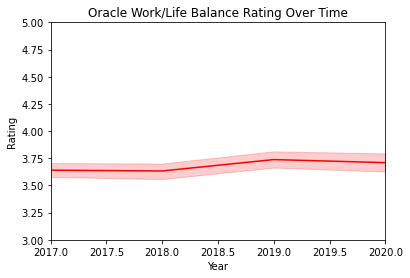

In [500]:
orcwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=oracle, color='#f80000').set(xlabel = 'Year', ylabel = 'Rating',title = 'Oracle Work/Life Balance Rating Over Time',xlim=(2017,2020), ylim=(3,5))

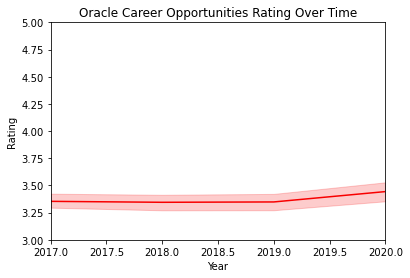

In [505]:
orccareerops_time = sns.lineplot(x='year',y='career_ops',data=oracle, color='#f80000').set(xlabel = 'Year', ylabel = 'Rating',title = 'Oracle Career Opportunities Rating Over Time',xlim=(2017,2020), ylim=(3,5))

# Close Look - Amazon

In [227]:
amazon

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
1001,Amazon,5.0,NaN,NaT,y,positive,approves,3.0,3.0,NaN
1002,Amazon,5.0,"Cincinnati, OH",2020-11-04,NaN,NaN,NaN,5.0,4.0,2020.0
1003,Amazon,5.0,"Seattle, WA",2016-01-10,y,positive,approves,4.0,5.0,2016.0
1004,Amazon,3.0,"Seattle, WA",2016-02-20,n,positive,approves,3.0,4.0,2016.0
1005,Amazon,5.0,"Phoenix, AZ",2018-12-03,y,positive,approves,3.0,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...
5996,Amazon,2.0,"Monee, IL",2020-05-28,NaN,NaN,NaN,NaN,NaN,2020.0
5997,Amazon,2.0,NaN,2020-05-28,n,NaN,NaN,1.0,3.0,2020.0
5998,Amazon,5.0,"Phoenix, AZ",2020-04-29,y,positive,approves,2.0,5.0,2020.0
5999,Amazon,4.0,"Irvine, CA",2020-05-05,y,positive,approves,4.0,4.0,2020.0


In [228]:
amazon.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2013.0,1
2016.0,2
2017.0,1
2018.0,2
2020.0,4864


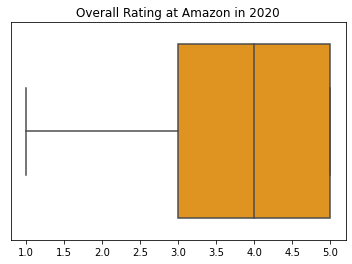

In [466]:
amzrating_box = sns.boxplot(x = 'rating',y='company',data=amazon, color='#FF9900').set(yticklabels = [], yticks = [],xlabel = '', ylabel = '', title = 'Overall Rating at Amazon in 2020')

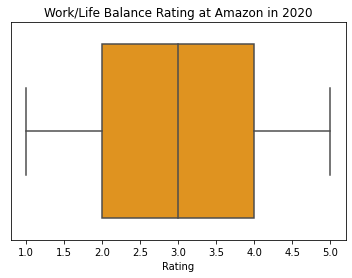

In [465]:
amzwlb_box = sns.boxplot(x = 'wlbalance',y='company',data=amazon, color='#FF9900').set(yticklabels = [], yticks = [],xlabel = 'Rating', ylabel = '',title = 'Work/Life Balance Rating at Amazon in 2020')

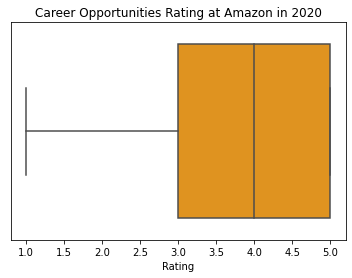

In [464]:
amzcarops_box = sns.boxplot(x = 'career_ops',y='company',data=amazon, color='#FF9900').set(yticklabels = [], yticks = [], xlabel = 'Rating', ylabel = '',title = 'Career Opportunities Rating at Amazon in 2020')

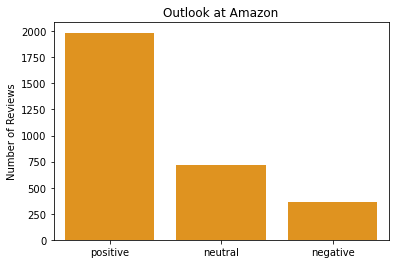

In [369]:
amzoutlook = amazon['outlook'].value_counts().to_frame().reset_index()
amzoutlook_bar = sns.barplot(x="index", y="outlook",
              data=amzoutlook, color='#FF9900').set(title = 'Outlook at Amazon', ylabel = 'Number of Reviews', xlabel = '')

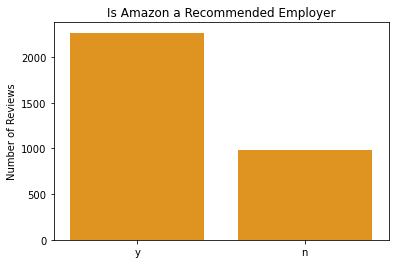

In [371]:
amzrecs = amazon['recommends'].value_counts().to_frame().reset_index()
amzrecs_bar = sns.barplot(x="index", y="recommends",
              data=amzrecs, color='#FF9900').set(title = 'Is Amazon a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

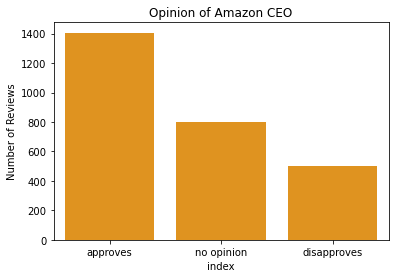

In [468]:
amzceo = amazon['ceo_opinion'].value_counts().to_frame().reset_index()
amzceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=amzceo, color='#FF9900').set(title = 'Opinion of Amazon CEO', ylabel = 'Number of Reviews')

# Close Look -  Microsoft

In [273]:
microsoft

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
18665,Microsoft,5.0,"Redmond, WA",2020-11-04,y,positive,approves,4.0,3.0,2020.0
18666,Microsoft,4.0,"Redmond, WA",2013-01-28,NaN,NaN,NaN,4.0,4.0,2013.0
18667,Microsoft,5.0,"Washington, DC",2020-11-02,y,positive,approves,5.0,5.0,2020.0
18668,Microsoft,5.0,"San Francisco, CA",2020-11-02,n,positive,approves,5.0,4.0,2020.0
18669,Microsoft,5.0,"Bellevue, WA",2020-11-03,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...
23660,Microsoft,5.0,NaN,2016-10-10,y,positive,approves,5.0,4.0,2016.0
23661,Microsoft,5.0,"Denver, CO",2016-10-10,y,positive,NaN,5.0,5.0,2016.0
23662,Microsoft,5.0,NaN,2016-10-10,y,positive,NaN,5.0,5.0,2016.0
23663,Microsoft,4.0,"San Jose, CA",2016-10-23,y,positive,approves,3.0,4.0,2016.0


In [274]:
#if time series, should any years be excluded?
microsoft.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2013.0,1
2016.0,325
2017.0,1638
2018.0,1048
2019.0,876
2020.0,1105


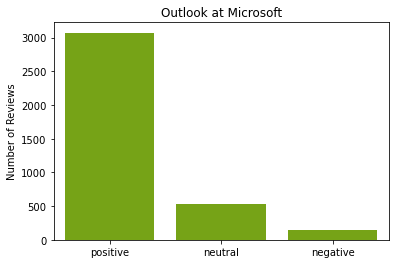

In [373]:
msfoutlook = microsoft['outlook'].value_counts().to_frame().reset_index()
msfoutlook_bar = sns.barplot(x="index", y="outlook",
              data=msfoutlook, color='#7FBA00').set(title = 'Outlook at Microsoft', ylabel = 'Number of Reviews', xlabel = '')

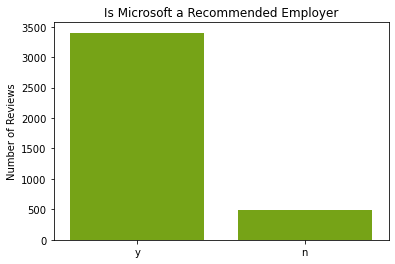

In [374]:
msfrecs = microsoft['recommends'].value_counts().to_frame().reset_index()
msfrecs_bar = sns.barplot(x="index", y="recommends",
              data=msfrecs, color='#7FBA00').set(title = 'Is Microsoft a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

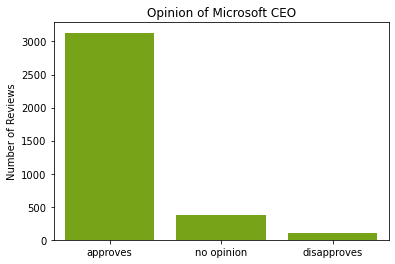

In [375]:
msfceo = microsoft['ceo_opinion'].value_counts().to_frame().reset_index()
msfceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=msfceo, color='#7FBA00').set(title = 'Opinion of Microsoft CEO', ylabel = 'Number of Reviews', xlabel = '')

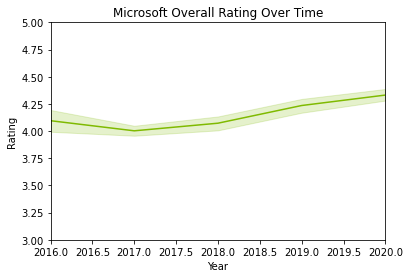

In [469]:
msfrating_time = sns.lineplot(x='year',y='rating',data=microsoft, color='#7FBA00').set(xlabel = 'Year', ylabel = 'Rating',title = 'Microsoft Overall Rating Over Time',xlim=(2016,2020), ylim=(3,5))

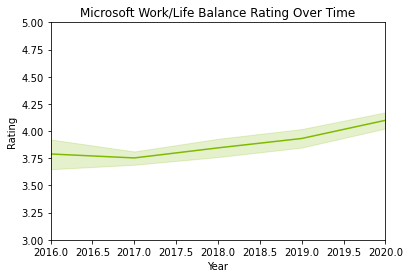

In [499]:
msfwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=microsoft, color='#7FBA00').set(xlabel = 'Year', ylabel = 'Rating',title = 'Microsoft Work/Life Balance Rating Over Time',xlim=(2016,2020), ylim=(3,5))

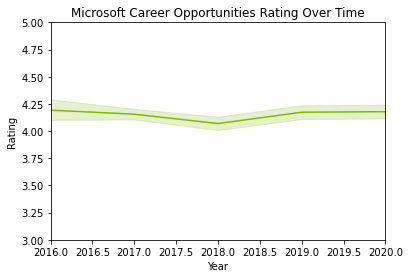

In [506]:
msfcareerops_time = sns.lineplot(x='year',y='career_ops',data=microsoft, color='#7FBA00').set(xlabel = 'Year', ylabel = 'Rating',title = 'Microsoft Career Opportunities Rating Over Time',xlim=(2016,2020), ylim=(3,5))

# Close Look - Uber

In [281]:
#at a glance
uber

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
29796,Uber,5.0,"San Francisco, CA",2020-09-30,NaN,NaN,NaN,NaN,NaN,2020.0
29797,Uber,5.0,"Chicago, IL",2020-11-04,NaN,NaN,NaN,NaN,NaN,2020.0
29798,Uber,4.0,"Denver, CO",2020-11-03,y,neutral,no opinion,5.0,3.0,2020.0
29799,Uber,4.0,"San Francisco, CA",2020-11-03,y,positive,NaN,3.0,4.0,2020.0
29800,Uber,4.0,"Reno, NV",2020-10-29,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...
34620,Uber,4.0,NaN,2014-08-09,y,positive,approves,1.0,3.0,2014.0
34621,Uber,5.0,NaN,2014-05-01,y,positive,approves,3.0,5.0,2014.0
34622,Uber,5.0,NaN,2013-11-26,y,positive,approves,5.0,5.0,2013.0
34623,Uber,5.0,NaN,2013-02-01,y,positive,NaN,3.0,4.0,2013.0


In [282]:
#if time series, should any years be excluded?
uber.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2012.0,1
2013.0,6
2014.0,226
2015.0,292
2016.0,448
2017.0,863
2018.0,815
2019.0,900
2020.0,1278


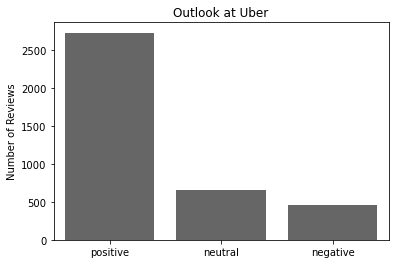

In [376]:
ubroutlook = uber['outlook'].value_counts().to_frame().reset_index()
ubroutlook_bar = sns.barplot(x="index", y="outlook",
              data=ubroutlook, color='#666666').set(title = 'Outlook at Uber', ylabel = 'Number of Reviews', xlabel = '')

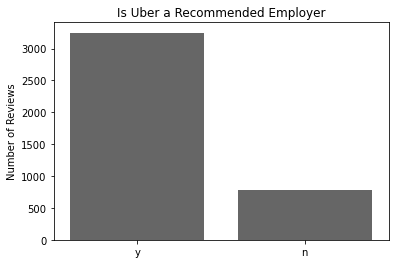

In [377]:
ubrrecs = uber['recommends'].value_counts().to_frame().reset_index()
ubrrecs_bar = sns.barplot(x="index", y="recommends",
              data=ubrrecs, color='#666666').set(title = 'Is Uber a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

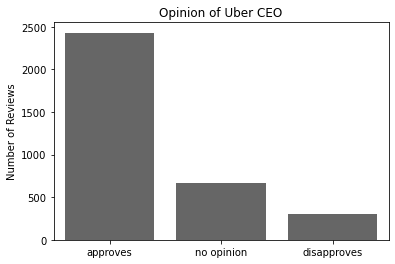

In [378]:
ubrceo = uber['ceo_opinion'].value_counts().to_frame().reset_index()
ubrceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=ubrceo, color='#666666').set(title = 'Opinion of Uber CEO', ylabel = 'Number of Reviews', xlabel = '')

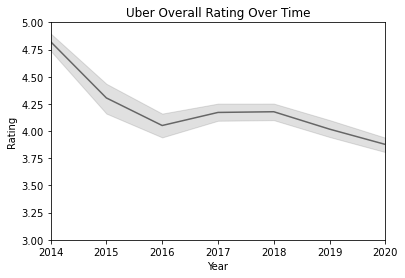

In [472]:
ubrrating_time = sns.lineplot(x='year',y='rating',data=uber, color='#666666').set(xlabel = 'Year', ylabel = 'Rating',title = 'Uber Overall Rating Over Time',xlim=(2014,2020), ylim=(3,5))

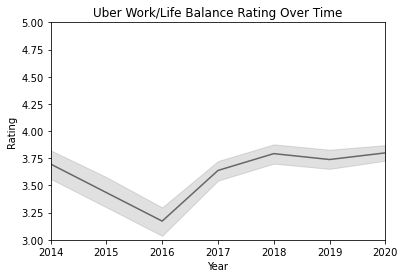

In [498]:
ubrwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=uber, color='#666666').set(xlabel = 'Year', ylabel = 'Rating',title = 'Uber Work/Life Balance Rating Over Time',xlim=(2014,2020), ylim=(3,5))

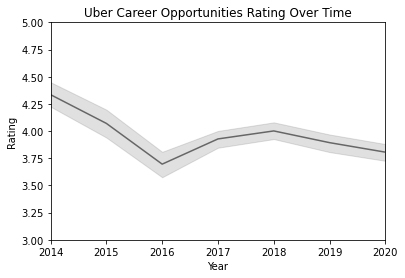

In [507]:
ubrcareerops_time = sns.lineplot(x='year',y='career_ops',data=uber, color='#666666').set(xlabel = 'Year', ylabel = 'Rating',title = 'Uber Career Opportunities Rating Over Time',xlim=(2014,2020), ylim=(3,5))

# Close Look - AirBnb

In [289]:
airbnb

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
0,Airbnb,5.0,"Portland, OR",NaT,y,positive,approves,4.0,5.0,NaN
1,Airbnb,5.0,"San Francisco, CA",2020-10-14,y,positive,approves,5.0,5.0,2020.0
2,Airbnb,4.0,"San Francisco, CA",2020-10-20,y,positive,approves,4.0,4.0,2020.0
3,Airbnb,5.0,"San Francisco, CA",2020-10-06,y,neutral,approves,5.0,5.0,2020.0
4,Airbnb,5.0,"Hurricane, UT",2020-10-03,y,positive,approves,5.0,5.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
996,Airbnb,3.0,Hamburg,2014-08-04,n,positive,no opinion,3.0,4.0,2014.0
997,Airbnb,1.0,"Dublin, Dublin",2014-06-12,n,negative,disapproves,1.0,2.0,2014.0
998,Airbnb,4.0,"Dublin, Dublin",2014-04-29,y,positive,no opinion,5.0,4.0,2014.0
999,Airbnb,4.0,Nicosia,2012-09-22,y,neutral,NaN,5.0,3.0,2012.0


In [290]:
airbnb.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2012.0,76
2013.0,3
2014.0,353
2015.0,109
2016.0,96
2017.0,72
2018.0,74
2019.0,58
2020.0,158


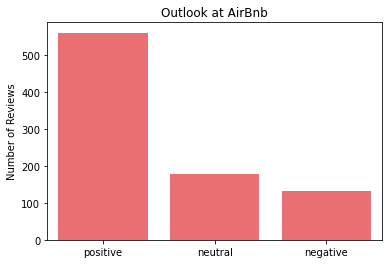

In [405]:
bnboutlook = airbnb['outlook'].value_counts().to_frame().reset_index()
bnboutlook_bar = sns.barplot(x="index", y="outlook",
              data=bnboutlook, color='#FF5A5F').set(title = 'Outlook at AirBnb', ylabel = 'Number of Reviews', xlabel = '')

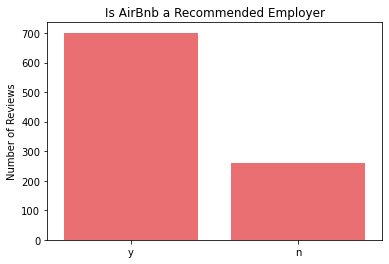

In [380]:
bnbrecs = airbnb['recommends'].value_counts().to_frame().reset_index()
bnbrecs_bar = sns.barplot(x="index", y="recommends",
              data=bnbrecs, color='#FF5A5F').set(title = 'Is AirBnb a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

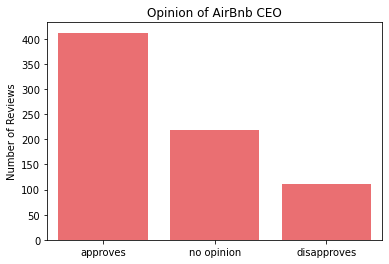

In [381]:
bnbceo = airbnb['ceo_opinion'].value_counts().to_frame().reset_index()
bnbceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=bnbceo, color='#FF5A5F').set(title = 'Opinion of AirBnb CEO', ylabel = 'Number of Reviews', xlabel = '')

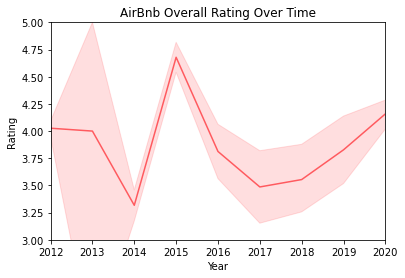

In [475]:
bnbrating_time = sns.lineplot(x='year',y='rating',data=airbnb, color='#FF5A5F').set(xlabel = 'Year', ylabel = 'Rating',title = 'AirBnb Overall Rating Over Time',xlim=(2012,2020), ylim=(3,5))

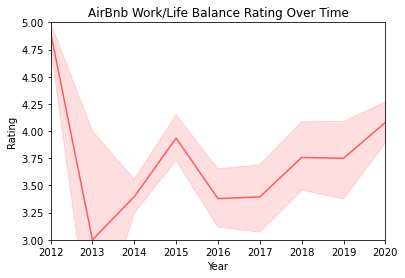

In [497]:
bnbwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=airbnb, color='#FF5A5F').set(xlabel = 'Year', ylabel = 'Rating',title = 'AirBnb Work/Life Balance Rating Over Time',xlim=(2012,2020), ylim=(3,5))

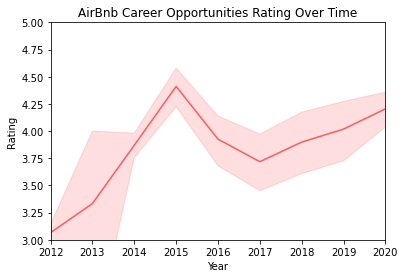

In [508]:
bnbcareerops_time = sns.lineplot(x='year',y='career_ops',data=airbnb, color='#FF5A5F').set(xlabel = 'Year', ylabel = 'Rating',title = 'AirBnb Career Opportunities Rating Over Time',xlim=(2012,2020), ylim=(3,5))

# Close Look - Twitter

In [303]:
twitter

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
28928,Twitter,5.0,Bangalore,NaT,y,positive,approves,5.0,5.0,NaN
28929,Twitter,5.0,"San Francisco, CA",2020-09-21,NaN,NaN,NaN,5.0,5.0,2020.0
28930,Twitter,4.0,NaN,2020-10-21,y,neutral,NaN,5.0,4.0,2020.0
28931,Twitter,4.0,"Boulder, CO",2020-10-16,y,positive,approves,4.0,4.0,2020.0
28932,Twitter,4.0,NaN,2020-10-13,y,positive,approves,5.0,4.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
29791,Twitter,5.0,NaN,2013-05-24,y,positive,approves,4.0,4.0,2013.0
29792,Twitter,1.0,NaN,2012-11-01,n,neutral,disapproves,3.0,1.0,2012.0
29793,Twitter,5.0,NaN,2012-09-20,NaN,NaN,NaN,NaN,NaN,2012.0
29794,Twitter,5.0,NaN,2012-06-06,y,positive,approves,3.0,4.0,2012.0


In [304]:
twitter.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2009.0,1
2011.0,2
2012.0,14
2013.0,81
2014.0,71
2015.0,186
2016.0,128
2017.0,115
2018.0,100


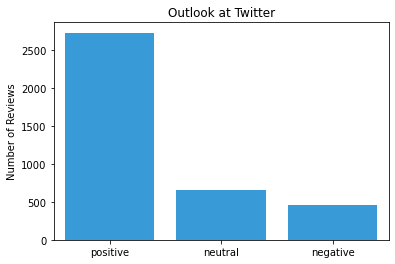

In [382]:
ttroutlook = uber['outlook'].value_counts().to_frame().reset_index()
ttroutlook_bar = sns.barplot(x="index", y="outlook",
              data=ttroutlook, color='#1DA1F2').set(title = 'Outlook at Twitter', ylabel = 'Number of Reviews', xlabel = '')

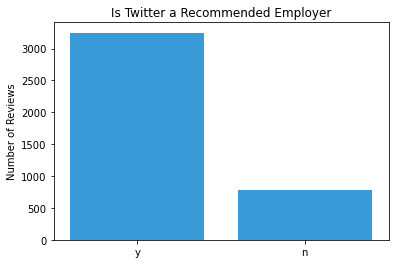

In [383]:
ttrrecs = uber['recommends'].value_counts().to_frame().reset_index()
ttrrecs_bar = sns.barplot(x="index", y="recommends",
              data=ttrrecs, color='#1DA1F2').set(title = 'Is Twitter a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

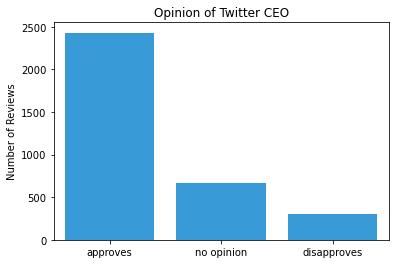

In [384]:

ttrceo = uber['ceo_opinion'].value_counts().to_frame().reset_index()
ttrceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=ttrceo, color='#1DA1F2').set(title = 'Opinion of Twitter CEO', ylabel = 'Number of Reviews', xlabel = '')

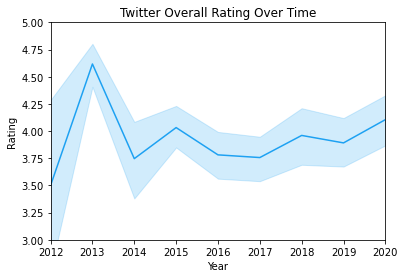

In [490]:
ttrrating_time = sns.lineplot(x='year',y='rating',data=twitter, color='#1DA1F2').set(xlabel = 'Year', ylabel = 'Rating',title = 'Twitter Overall Rating Over Time',xlim=(2012,2020), ylim=(3,5))

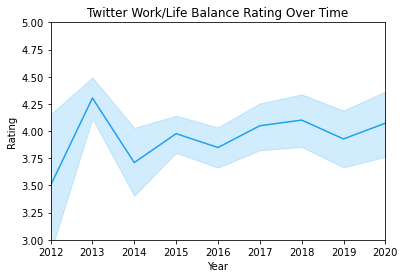

In [496]:
ttrwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=twitter, color='#1DA1F2').set(xlabel = 'Year', ylabel = 'Rating',title = 'Twitter Work/Life Balance Rating Over Time',xlim=(2012,2020), ylim=(3,5))

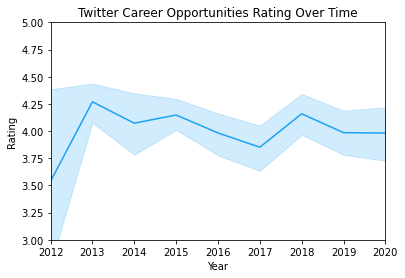

In [509]:
ttrcareerops_time = sns.lineplot(x='year',y='career_ops',data=twitter, color='#1DA1F2').set(xlabel = 'Year', ylabel = 'Rating',title = 'Twitter Career Opportunities Rating Over Time',xlim=(2012,2020), ylim=(3,5))

# Close Look - Snap

In [312]:
snap

,company,rating,location,revdate,recommends,outlook,ceo_opinion,wlbalance,career_ops,year
28664,Snap,5.0,"Santa Monica, CA",NaT,y,positive,NaN,5.0,5.0,NaN
28665,Snap,5.0,"Santa Monica, CA",2020-10-30,NaN,NaN,NaN,NaN,NaN,2020.0
28666,Snap,5.0,NaN,2020-10-29,NaN,NaN,NaN,NaN,NaN,2020.0
28667,Snap,4.0,"Los Angeles, CA",2020-10-28,NaN,NaN,NaN,NaN,NaN,2020.0
28668,Snap,4.0,"Santa Monica, CA",2020-10-26,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...
28923,Snap,5.0,NaN,2018-07-31,y,neutral,no opinion,3.0,5.0,2018.0
28924,Snap,1.0,NaN,2018-06-18,n,negative,disapproves,1.0,2.0,2018.0
28925,Snap,2.0,NaN,2018-03-09,n,negative,disapproves,3.0,2.0,2018.0
28926,Snap,3.0,NaN,2017-07-18,n,neutral,no opinion,3.0,5.0,2017.0


In [313]:
snap.groupby(by=['year'])['company'].count().to_frame()

,company
year,
2013.0,1
2014.0,5
2015.0,17
2016.0,17
2017.0,40
2018.0,86
2019.0,48
2020.0,48


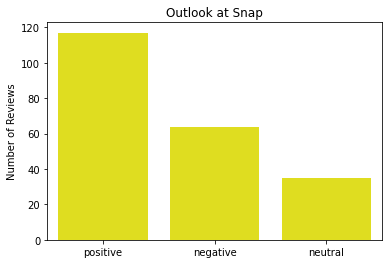

In [511]:
snpoutlook = snap['outlook'].value_counts().to_frame().reset_index()
snpoutlook_bar = sns.barplot(x="index", y="outlook",
              data=snpoutlook, color='#fffc00').set(title = 'Outlook at Snap', ylabel = 'Number of Reviews', xlabel = '')

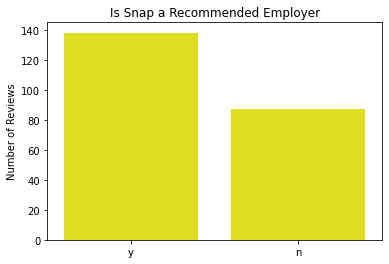

In [512]:
snprecs = snap['recommends'].value_counts().to_frame().reset_index()
snprecs_bar = sns.barplot(x="index", y="recommends",
              data=snprecs, color='#fffc00').set(title = 'Is Snap a Recommended Employer', ylabel = 'Number of Reviews', xlabel = '')

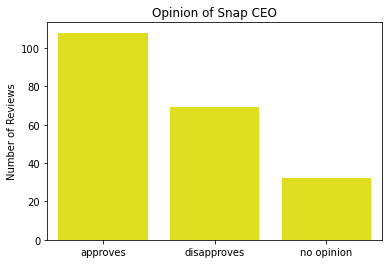

In [388]:
snpceo = snap['ceo_opinion'].value_counts().to_frame().reset_index()
snpceo_bar = sns.barplot(x="index", y="ceo_opinion",
              data=snpceo, color='#fffc00').set(title = 'Opinion of Snap CEO', ylabel = 'Number of Reviews', xlabel = '')

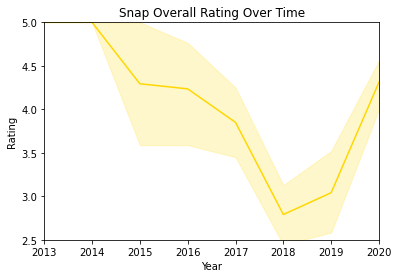

In [493]:
snprating_time = sns.lineplot(x='year',y='rating',data=snap, color='gold').set(xlabel = 'Year', ylabel = 'Rating',title = 'Snap Overall Rating Over Time',xlim=(2013,2020), ylim=(2.5,5))

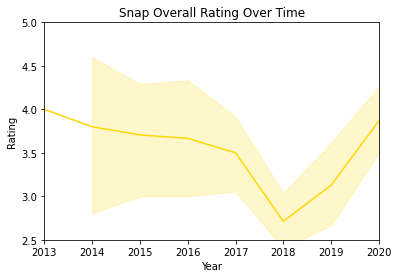

In [494]:
snpwlbalance_time = sns.lineplot(x='year',y='wlbalance',data=snap, color='gold').set(xlabel = 'Year', ylabel = 'Rating',title = 'Snap Work/Life Balance Rating Over Time',xlim=(2013,2020), ylim=(2.5,5))

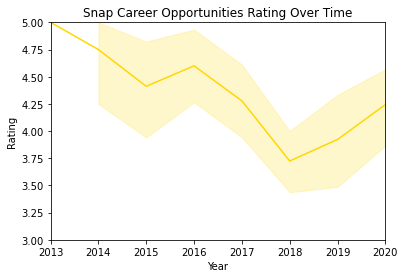

In [510]:
snpcareerops_time = sns.lineplot(x='year',y='career_ops',data=snap, color='gold').set(xlabel = 'Year', ylabel = 'Rating',title = 'Snap Career Opportunities Rating Over Time',xlim=(2013,2020), ylim=(3,5))